In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
from utils import scatter_plot, qqplot

In [2]:
ifmha = pd.read_csv('./tauraat-230322-150349.csv', converters={'site_no': str}, low_memory=False)
hydro_subset = pd.read_csv('./data/hydroswot-subset-230329-120803.csv', converters={'site_no': str}, low_memory=False)

In [3]:
sites = hydro_subset['site_no'].value_counts()
hydro_stat = hydro_subset[hydro_subset["site_no"].isin(sites.index[sites>=30].to_list())]

print("site locations with minimum of 30 observations: ")
print(f'Number of observations: {hydro_stat.shape}')
print('Number of sites:')
sites = hydro_stat['site_no'].value_counts()
sites.describe()

site locations with minimum of 30 observations: 
Number of observations: (7666, 7)
Number of sites:


count    174.000000
mean      44.057471
std       23.867581
min       30.000000
25%       33.000000
50%       37.000000
75%       44.000000
max      159.000000
Name: site_no, dtype: float64

In [4]:
pct = 0.01
stat_dist = [] # statistical distance
for idx, site in enumerate(sites):
    if sites.index[idx] in ifmha['site_no'].tolist():
        data1 = hydro_subset[hydro_subset['site_no'] == sites.index[idx]]['mean_depth_va']
        data1 = data1[(data1 > data1.quantile(pct)) & (data1 < data1.quantile(1-pct))].values

        data2 = ifmha[ifmha['site_no'] == sites.index[idx]]['chan_mean_depth']
        data2 = data2[(data2 > data2.quantile(pct)) & (data2 < data2.quantile(1-pct))].values
    else:
        print(f'site number: {sites.index[idx]} is not in IFMHA!')
        continue

    max_val = np.max(np.hstack((data1, data2)))
    min_val = np.min(np.hstack((data1, data2)))
    q, _ = np.histogram(data1, range=(min_val, max_val), density=True)
    p, _ = np.histogram(data2, range=(min_val, max_val), density=True)
    stat_dist.append(jensenshannon(p, q))


    print(f'site number: {sites.index[idx]}, Jensen-Shannon Divergence: {jensenshannon(p, q):.4f}, HYDRoSWOT: {data1.shape[0]}, IFMHA: {data2.shape[0]}')
    # qqplot(data1, data2)

site number: 02239501, Jensen-Shannon Divergence: 0.2686, HYDRoSWOT: 155, IFMHA: 392
site number: 06893000, Jensen-Shannon Divergence: 0.1598, HYDRoSWOT: 151, IFMHA: 1703
site number: 06813500 is not in IFMHA!
site number: 06610000, Jensen-Shannon Divergence: 0.3249, HYDRoSWOT: 136, IFMHA: 5345
site number: 06807000, Jensen-Shannon Divergence: 0.3050, HYDRoSWOT: 130, IFMHA: 6448
site number: 06601200, Jensen-Shannon Divergence: 0.2701, HYDRoSWOT: 128, IFMHA: 2932
site number: 06486000, Jensen-Shannon Divergence: 0.2472, HYDRoSWOT: 126, IFMHA: 5367
site number: 06818000, Jensen-Shannon Divergence: 0.1415, HYDRoSWOT: 107, IFMHA: 1368
site number: 06895500, Jensen-Shannon Divergence: 0.1958, HYDRoSWOT: 101, IFMHA: 1283
site number: 06909000, Jensen-Shannon Divergence: 0.2220, HYDRoSWOT: 101, IFMHA: 1290
site number: 06934500, Jensen-Shannon Divergence: 0.1951, HYDRoSWOT: 83, IFMHA: 1076
site number: 07374525, Jensen-Shannon Divergence: 0.1705, HYDRoSWOT: 73, IFMHA: 271
site number: 073740

In [5]:
js_divergence_mean_depth = np.array(stat_dist)

In [6]:
pct = 0.01
stat_dist = [] # statistical distance

for idx, site in enumerate(sites):
    if sites.index[idx] in ifmha['site_no'].tolist():
        data1 = hydro_subset[hydro_subset['site_no'] == sites.index[idx]]['max_depth_va']
        data1 = data1[(data1 > data1.quantile(pct)) & (data1 < data1.quantile(1-pct))].values

        data2 = ifmha[ifmha['site_no'] == sites.index[idx]]['chan_max_depth']
        data2 = data2[(data2 > data2.quantile(pct)) & (data2 < data2.quantile(1-pct))].values
    else:
        print(f'{sites.index[idx]} is not in IFMHA!')
        continue

    max_val = np.max(np.hstack((data1, data2)))
    min_val = np.min(np.hstack((data1, data2)))
    q, _ = np.histogram(data1, range=(min_val, max_val), density=True)
    p, _ = np.histogram(data2, range=(min_val, max_val), density=True)
    stat_dist.append(jensenshannon(p, q))

    print(f'site number: {sites.index[idx]}, Jensen-Shannon Divergence: {jensenshannon(p, q):.4f}, HYDRoSWOT: {data1.shape[0]}, IFMHA: {data2.shape[0]}')
    # qqplot(data1, data2)

    # max_val = np.max(np.hstack((data1, data2)))
    # min_val = np.min(np.hstack((data1, data2)))
    # fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
    # ax1.hist(data1, range=(min_val, max_val), density=True)
    # ax2.hist(data2, range=(min_val, max_val), density=True)
    # plt.show()

site number: 02239501, Jensen-Shannon Divergence: 0.4352, HYDRoSWOT: 155, IFMHA: 392
site number: 06893000, Jensen-Shannon Divergence: 0.1801, HYDRoSWOT: 151, IFMHA: 1703
06813500 is not in IFMHA!
site number: 06610000, Jensen-Shannon Divergence: 0.3484, HYDRoSWOT: 136, IFMHA: 5345
site number: 06807000, Jensen-Shannon Divergence: 0.2434, HYDRoSWOT: 130, IFMHA: 6448
site number: 06601200, Jensen-Shannon Divergence: 0.1941, HYDRoSWOT: 128, IFMHA: 2932
site number: 06486000, Jensen-Shannon Divergence: 0.2972, HYDRoSWOT: 126, IFMHA: 5367
site number: 06818000, Jensen-Shannon Divergence: 0.1923, HYDRoSWOT: 107, IFMHA: 1368
site number: 06895500, Jensen-Shannon Divergence: 0.2728, HYDRoSWOT: 101, IFMHA: 1283
site number: 06909000, Jensen-Shannon Divergence: 0.2768, HYDRoSWOT: 101, IFMHA: 1290
site number: 06934500, Jensen-Shannon Divergence: 0.2758, HYDRoSWOT: 83, IFMHA: 1076
site number: 07374525, Jensen-Shannon Divergence: 0.4004, HYDRoSWOT: 73, IFMHA: 271
site number: 07374000, Jensen-Sh

In [7]:
js_divergence_max_depth = np.array(stat_dist)

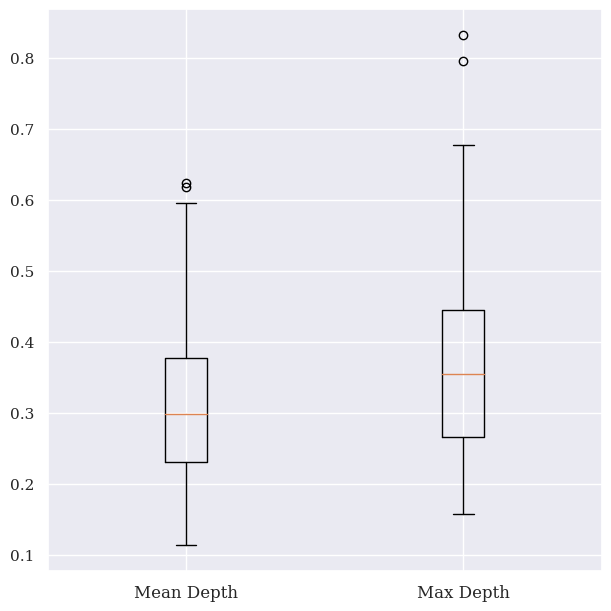

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), constrained_layout=True)

ax.boxplot([js_divergence_mean_depth, js_divergence_max_depth])
ax.set_xticklabels(['Mean Depth', 'Max Depth'])
ax.tick_params(axis='x', labelrotation=0, labelsize=12)
ax.grid(True)
# ax.set_title(f'Jensen-Shannon Divergence')

plt.savefig(f'./js-divergence.pdf', format='pdf', bbox_inches='tight', pad_inches=0.05)
plt.show()

In [34]:
pd.DataFrame({'Mean Depth': js_divergence_mean_depth, 'Max Depth': js_divergence_max_depth}).describe()

,Mean Depth,Max Depth
count,163.000000,163.000000
mean,0.314365,0.366359
std,0.111874,0.126883
min,0.113473,0.157373
25%,0.230555,0.266617
50%,0.297802,0.354447
75%,0.377758,0.445233
max,0.623598,0.832555


site number: 09217000, Jensen-Shannon Divergence: 0.5873, HYDRoSWOT: 28, IFMHA: 383


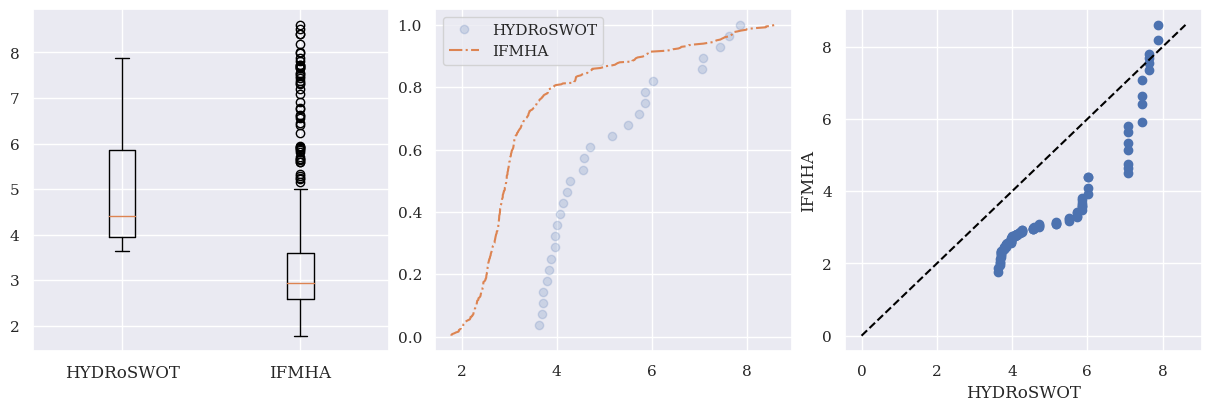

In [6]:
site = '09217000'
pct = 0.01
field='max'

data1 = hydro_subset[hydro_subset['site_no'] == site][f'{field}_depth_va']
data1 = data1[(data1 > data1.quantile(pct)) & (data1 < data1.quantile(1-pct))].values

data2 = ifmha[ifmha['site_no'] == site][f'chan_{field}_depth']
data2 = data2[(data2 > data2.quantile(pct)) & (data2 < data2.quantile(1-pct))].values

max_val = np.max(np.hstack((data1, data2)))
min_val = np.min(np.hstack((data1, data2)))
q, _ = np.histogram(data1, range=(min_val, max_val), density=True)
p, _ = np.histogram(data2, range=(min_val, max_val), density=True)

print(f'site number: {site}, Jensen-Shannon Divergence: {jensenshannon(p, q):.4f}, HYDRoSWOT: {data1.shape[0]}, IFMHA: {data2.shape[0]}')
qqplot(data1, data2, axis_names=['HYDRoSWOT', 'IFMHA'], site_name=site, quantiles=100)
# The x – quantiles are lower than the y – quantiles. It indicates x values have a tendency to be lower than the y values.

In [82]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [85]:
def llv(p, q):
    return - np.sum(p * np.log(q))